In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_full=pd.read_csv('Leads.csv')

In [3]:
df_full.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Sanity Checks

In [4]:
df_full.shape

(9240, 37)

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
print('There are {0} Categorical Columns and {1} Numerical columns'.format(len(df_full.select_dtypes(include='O').columns),len(df_full.describe().columns)))

There are 30 Categorical Columns and 7 Numerical columns


In [7]:
df_full.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# DATA Cleaining

In [8]:
# Examining the dtype Object columns

In [9]:
Object_columns=df_full.select_dtypes(include='O').columns

In [10]:
for i in Object_columns:
    if i!='Prospect ID':
        print(i)
        print(df_full[i].value_counts())
        print('________________________________________________________________________')
        

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
________________________________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
________________________________________________________________________
Do Not Email
No     8506
Yes     734
Name: Do Not Email, dty

### Select in certain columns means null value since the customer didnt choose an option. So all features having 'Select' maybe replace with nan value

In [11]:
for i in Object_columns:
    df_full[i]=df_full[i].map(lambda x:np.nan if x=='Select' else x)

In [12]:
for i in Object_columns:
    if i!='Prospect ID':
        print(i)
        print(df_full[i].value_counts())
        print('________________________________________________________________________')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
________________________________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
________________________________________________________________________
Do Not Email
No     8506
Yes     734
Name: Do Not Email, dty

It can be observed that few of the features have constant values such as Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque

These features indicate that these features wouldnt add any predictive power in the modelling stage since they have no variance. So they can be dropped.

In [13]:
drop_columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque']
df_full=df_full.drop(drop_columns,axis=1)

'Prospect ID' and 'Lead Number' are not usefull for predicting Converted. They can be dropped

In [14]:
df=df_full.drop(['Prospect ID','Lead Number'],axis=1)

# NULL Value Treatment


In [15]:
Null_percentage=df.isnull().sum()/len(df)*100
Null_percentage

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

### Dropping all columns with more than 40% missing values

In [16]:
df=df.drop(Null_percentage[Null_percentage>40].index,axis=1)

In [17]:
df.isnull().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

Now checking whether any rows have indian cities and Nan country

In [18]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
df['Country']=df.Country.fillna('Unkown')

In [20]:
df.groupby('City').Country.value_counts()

City                         Country             
Mumbai                       India                   2918
                             Unkown                   211
                             United States             30
                             United Arab Emirates      17
                             Saudi Arabia               7
                             Australia                  6
                             Singapore                  6
                             United Kingdom             6
                             Canada                     3
                             Qatar                      3
                             Hong Kong                  2
                             Kuwait                     2
                             Oman                       2
                             Bahrain                    1
                             Belgium                    1
                             China                      1
                      

#### It appears that few of the Country names are wrong or are shown different maybe due to use of VPN. Lets change the values of country to India for all cities in maharastra,mumbai and Thane

In [21]:
cities = ['Mumbai', 'Thane & Outskirts', 'Other Cities of Maharashtra']

# Create a boolean mask to filter rows where 'City' is in the specified cities
mask = df['City'].isin(cities)

# Update the 'Country' column for the selected rows to 'India'
df.loc[mask, 'Country'] = 'India'

In [22]:
df.groupby('City').Country.value_counts()

City                         Country             
Mumbai                       India                   3222
Other Cities                 India                    564
                             Unkown                    55
                             United Arab Emirates      19
                             Saudi Arabia               9
                             United States              6
                             Singapore                  4
                             Nigeria                    3
                             South Africa               3
                             Australia                  2
                             Bahrain                    2
                             Bangladesh                 2
                             France                     2
                             Hong Kong                  2
                             Kuwait                     2
                             Oman                       2
                      

In [23]:
df['City']=df['City'].fillna('Unknown')

In [24]:
df.groupby('Country').City.value_counts()

Country               City                       
Asia/Pacific Region   Unknown                           2
Australia             Other Cities                      2
                      Unknown                           2
Bahrain               Other Cities                      2
                      Tier II Cities                    1
Bangladesh            Other Cities                      2
Canada                Unknown                           1
China                 Unknown                           1
Denmark               Other Cities                      1
France                Other Cities                      2
                      Other Metro Cities                2
Germany               Other Cities                      1
Ghana                 Other Cities                      1
                      Unknown                           1
Hong Kong             Other Cities                      2
                      Unknown                           1
India                 

In [25]:
df.groupby('Country').Converted.sum()

Country
Asia/Pacific Region        1
Australia                  0
Bahrain                    3
Bangladesh                 1
Canada                     0
China                      0
Denmark                    1
France                     2
Germany                    1
Ghana                      0
Hong Kong                  1
India                   2694
Italy                      0
Kenya                      0
Kuwait                     0
Liberia                    0
Nigeria                    0
Oman                       2
Philippines                0
Qatar                      1
Russia                     0
Saudi Arabia               2
Singapore                  7
South Africa               1
Sri Lanka                  0
Sweden                     1
Tanzania                   0
Uganda                     0
United Arab Emirates      12
United Kingdom             2
United States              9
Unkown                   819
unknown                    1
Name: Converted, dtype: int64

In [26]:
df['Country'].value_counts()

India                   6963
Unkown                  2127
United Arab Emirates      32
United States             29
Singapore                 13
Saudi Arabia              11
unknown                    5
United Kingdom             5
Qatar                      5
France                     4
South Africa               4
Oman                       4
Nigeria                    4
Australia                  4
Hong Kong                  3
Bahrain                    3
Sweden                     2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Kuwait                     2
Italy                      2
Sri Lanka                  1
Liberia                    1
Philippines                1
Denmark                    1
Kenya                      1
Russia                     1
Tanzania                   1
Canada                     1
Germany                    1
China                      1
Name: Country, dtype: int64

In [27]:
df['Country']=df['Country'].apply(lambda x:'Unknown' if x=='unknown' else x)

In [28]:
df['Country'].value_counts()

India                   6963
Unkown                  2127
United Arab Emirates      32
United States             29
Singapore                 13
Saudi Arabia              11
Unknown                    5
United Kingdom             5
Qatar                      5
France                     4
South Africa               4
Oman                       4
Nigeria                    4
Australia                  4
Hong Kong                  3
Bahrain                    3
Sweden                     2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Kuwait                     2
Italy                      2
Sri Lanka                  1
Liberia                    1
Philippines                1
Denmark                    1
Kenya                      1
Russia                     1
Tanzania                   1
Canada                     1
Germany                    1
China                      1
Name: Country, dtype: int64

Since all other countries have very less numbers, lets group them into a category called Others

In [29]:
df['Country']=df['Country'].apply(lambda x: x if x in ['India','Unkown'] else 'Others')

In [30]:
df['Country'].value_counts()

India     6963
Unkown    2127
Others     150
Name: Country, dtype: int64

In [31]:
df['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Since Unkown has higher occurance then any other possible categories, It is safe to drop City. Moreover India has highest occurance followed by Unknown so most of the applicants might be from India anyway. So Country can be dropped too without losing much of predicitive power.

In [32]:
df=df.drop(['Country','City'],axis=1)

In [33]:
df.isnull().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [34]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [35]:
df['Specialization']=df.Specialization.fillna('Unknown')

In [36]:
df['What matters most to you in choosing a course'].value_counts()/len(df)

Better Career Prospects      0.706494
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

It appears that variable 'What matters most to you in choosing a course' has 70% of only 1 level 'Better Career Prospects'. It is safe to drop this column since it doesnt have  much variance and will not provide any predictive power. It appears that Better career prospects is the major driving factor for people to come to Education X.

In [37]:
df=df.drop('What matters most to you in choosing a course',axis=1)

In [38]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
df['What is your current occupation']=df['What is your current occupation'].fillna('Unknown')

In [40]:
df.groupby('What is your current occupation').Converted.value_counts()

What is your current occupation  Converted
Businessman                      1               5
                                 0               3
Housewife                        1              10
Other                            1              10
                                 0               6
Student                          0             132
                                 1              78
Unemployed                       0            3159
                                 1            2441
Unknown                          0            2320
                                 1             370
Working Professional             1             647
                                 0              59
Name: Converted, dtype: int64

In [41]:
df['Tags']=df.Tags.fillna('Unknown')

All categorical variables with Unknown values can be dealt with during dummy variable creation

In [42]:
df.isnull().sum()/len(df)*100

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity          

Drop the rows with less than 2 % Null values

In [43]:
df=df.dropna(axis=0,how='any')

In [44]:
df.isnull().sum()/len(df)*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

All the NUll values have been dealth with

# Outlier treatment

Logistic Regression is sensitive to outliers, hence they have to be treated before modelling

In [45]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [46]:
# Numericcal variables
Num_cols=df.describe().columns

In [47]:
Num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

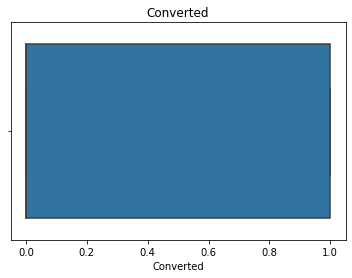

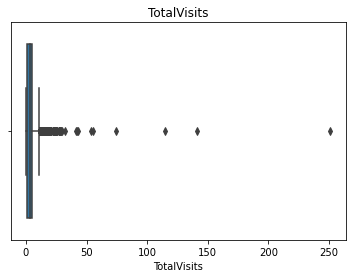

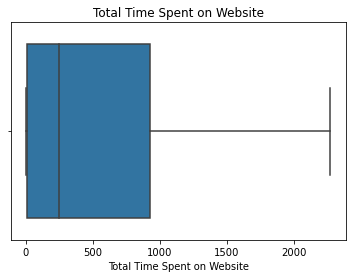

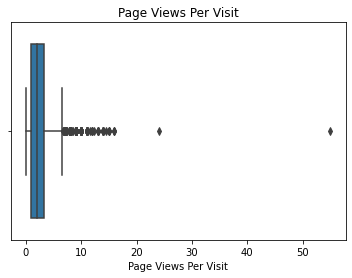

In [48]:
for i in Num_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

There appears to be outliers in 'TotalVisits' and 'Page Views Per Visit'

In [49]:
def outlier_treat(df,col):
    Upper_IQR= df[col].quantile(0.95)
    Lower_IQR= df[col].quantile(0.05)
    return df[(df[col]<=Upper_IQR) & (df[col]>=Lower_IQR)]
    

In [50]:
df=outlier_treat(df,'TotalVisits')
df=outlier_treat(df,'Page Views Per Visit')
    

In [51]:
df.shape

(8445, 20)

In [52]:
print('Total available rows after data cleaning are {0}'.format(df.shape[0]))
print('Percentage of data remaining after data cleaning {0}'.format(df.shape[0]/9240*100))
print('{0} is a good enough amount of data'.format(df.shape[0]/9240*100))

Total available rows after data cleaning are 8445
Percentage of data remaining after data cleaning 91.3961038961039
91.3961038961039 is a good enough amount of data


# Bivarate Analysis of Numerical variables

<Figure size 1080x720 with 0 Axes>

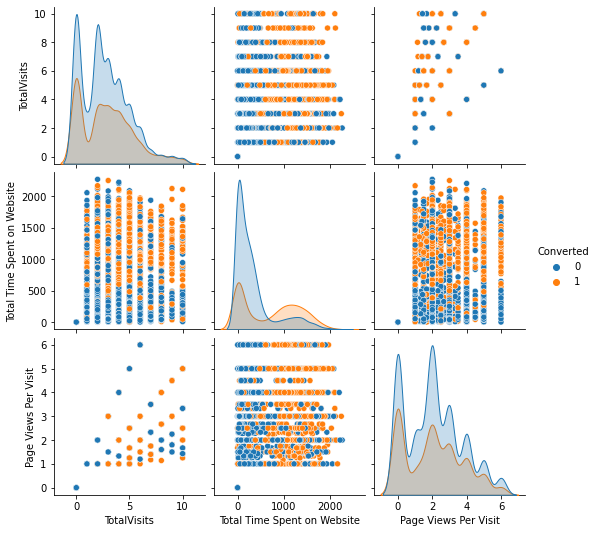

In [53]:
plt.figure(figsize=[15,10])
sns.pairplot(df[Num_cols],hue='Converted')
plt.show()

### Insights from bivariate analysis

- As TotalVisits increases the Conversion rate increases. Highest conversion appears above 7 Visits to website.
- There is higher number of Converts when time spent on website is more than approximately 800. So making the visitors of website to spend more time on teh website could increase conversion rate.
- TotalVisits and Page Views Per Visit have a strong linear relationship

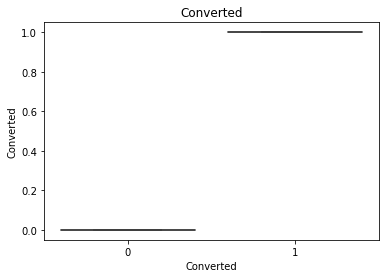

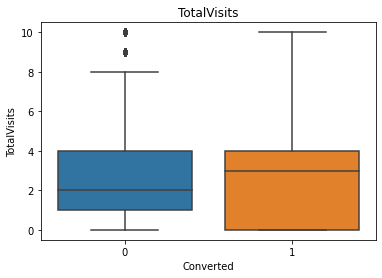

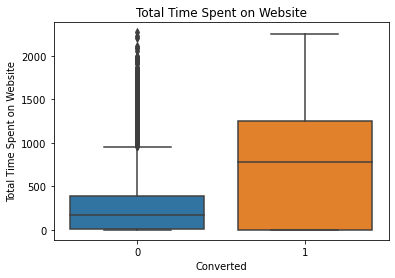

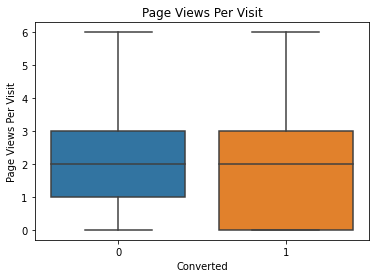

In [54]:
for i in Num_cols:
    sns.boxplot(x=df['Converted'],y=df[i])
    plt.title(i)
    plt.show()

# Observations
- TotalVisits: The median value for Converted Leads is higher than non converted leads
- Total Time Spent On Website: The median and IQR between 25 percentyile to 75 Percentile of Total time spent on website is significantly higher. Time spent on website could be a significant indicator for conversion.
- Page Views Per Visit: The distribution appears to be identical for converted and non converted leads for Page Views per visit. It is an insignificant variable. Page Views Per Visit can be dropped since it is also having collinearity with Total Visits.

In [55]:
df=df.drop('Page Views Per Visit',axis=1)

# Univariate Analysis of Categorical Variables

In [56]:
def Uni_cat(df,col):
    plt.figure(figsize=[15,10])
    sns.countplot(df[col],hue=df['Converted'])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

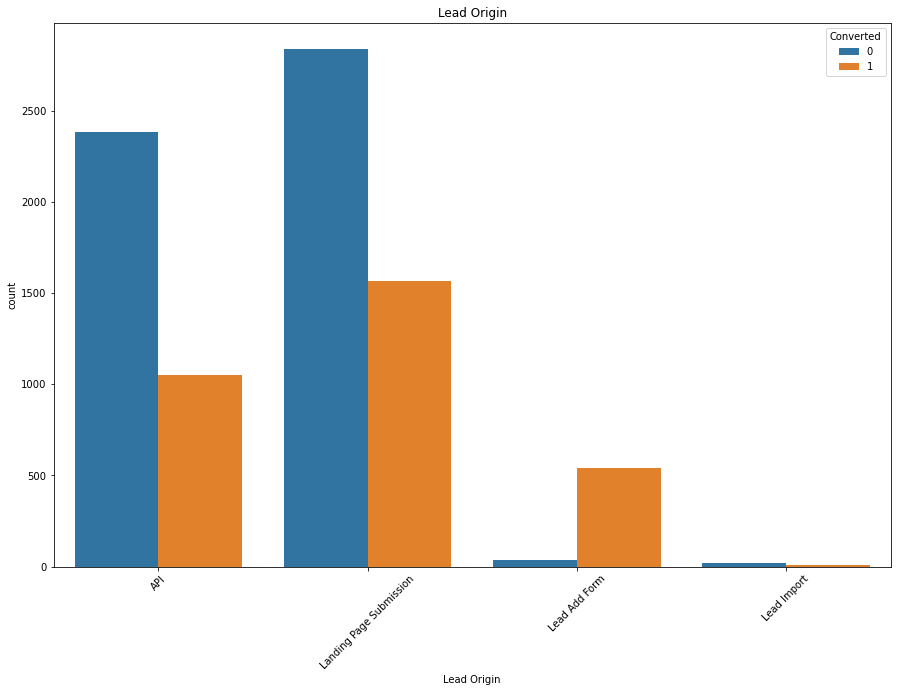

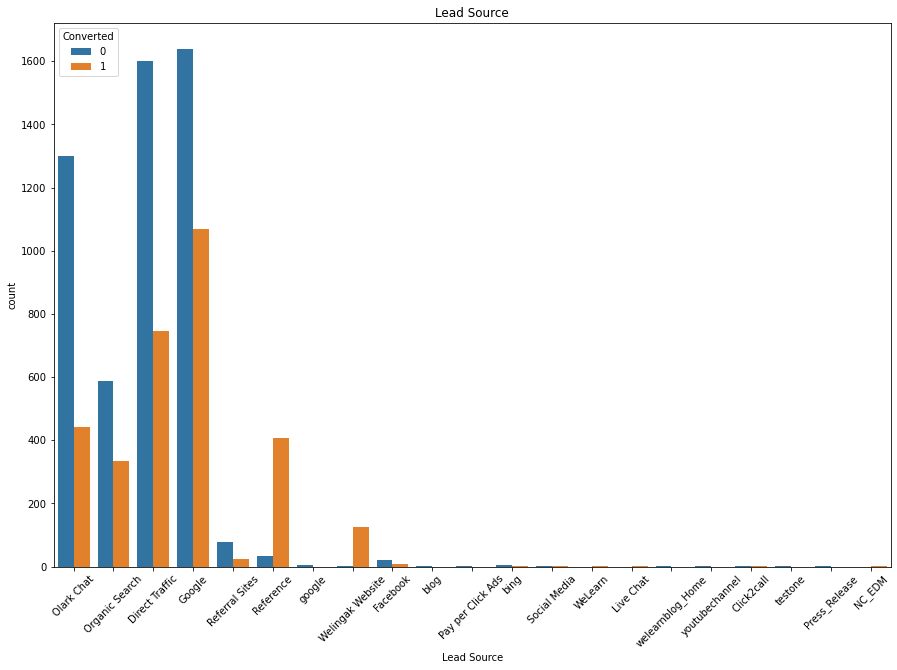

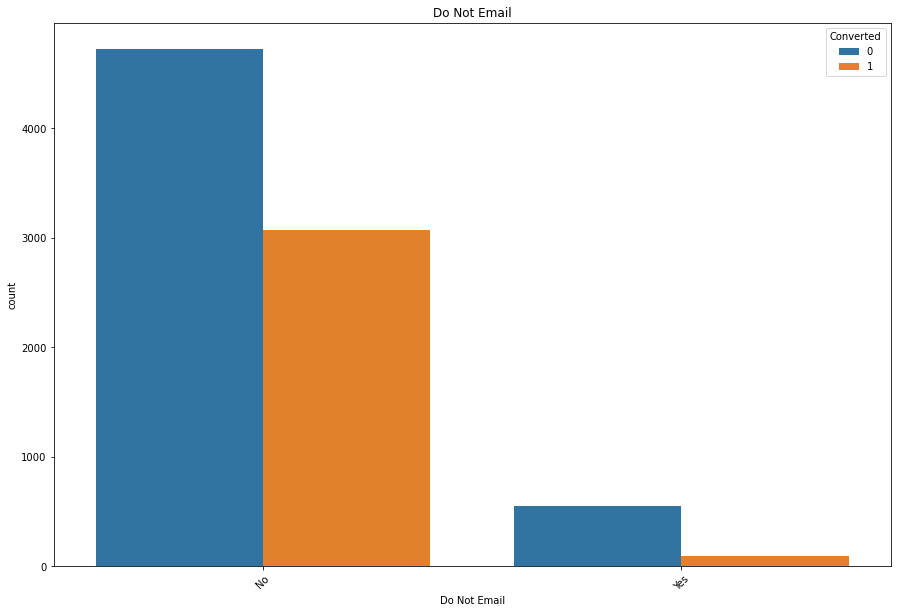

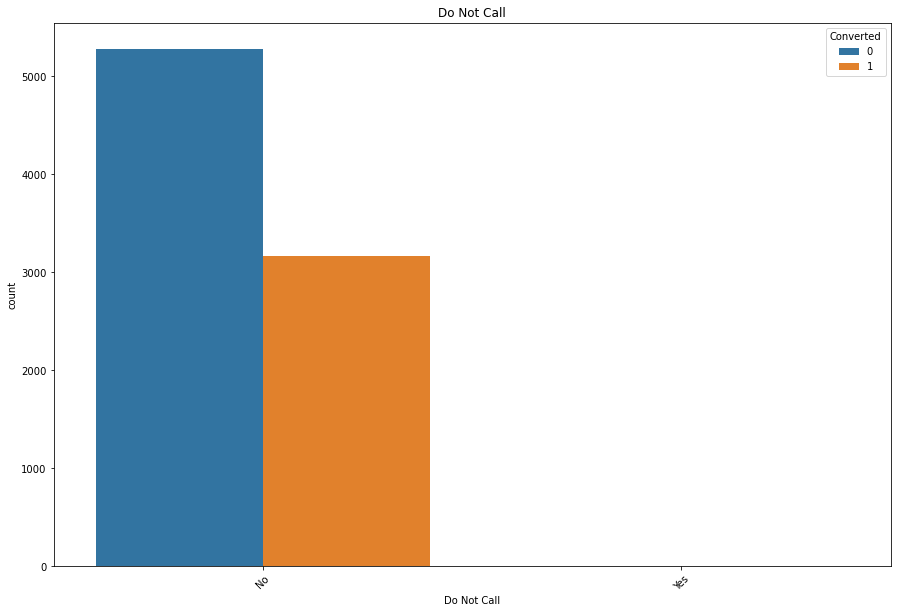

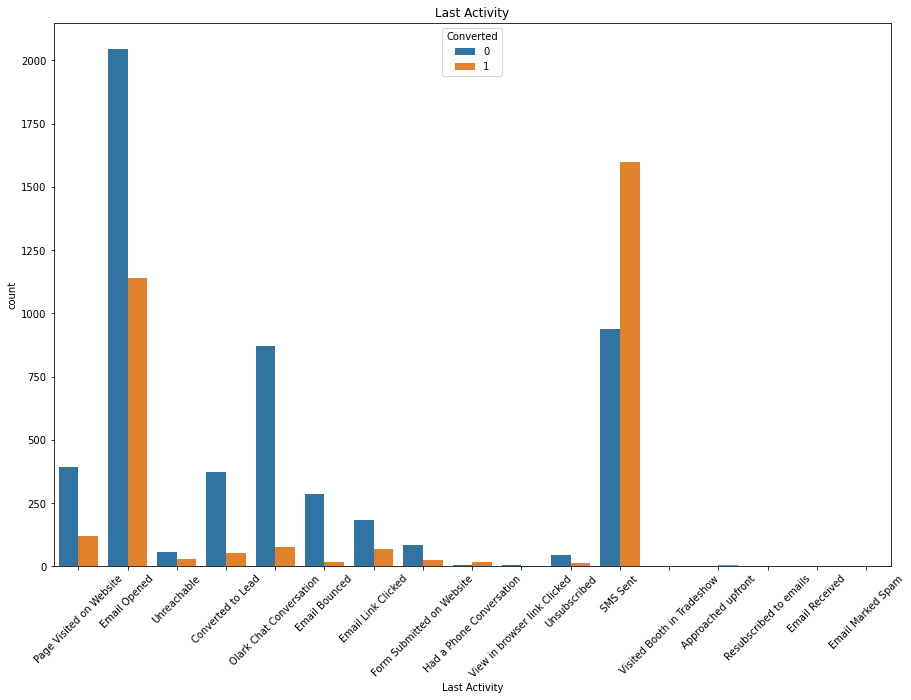

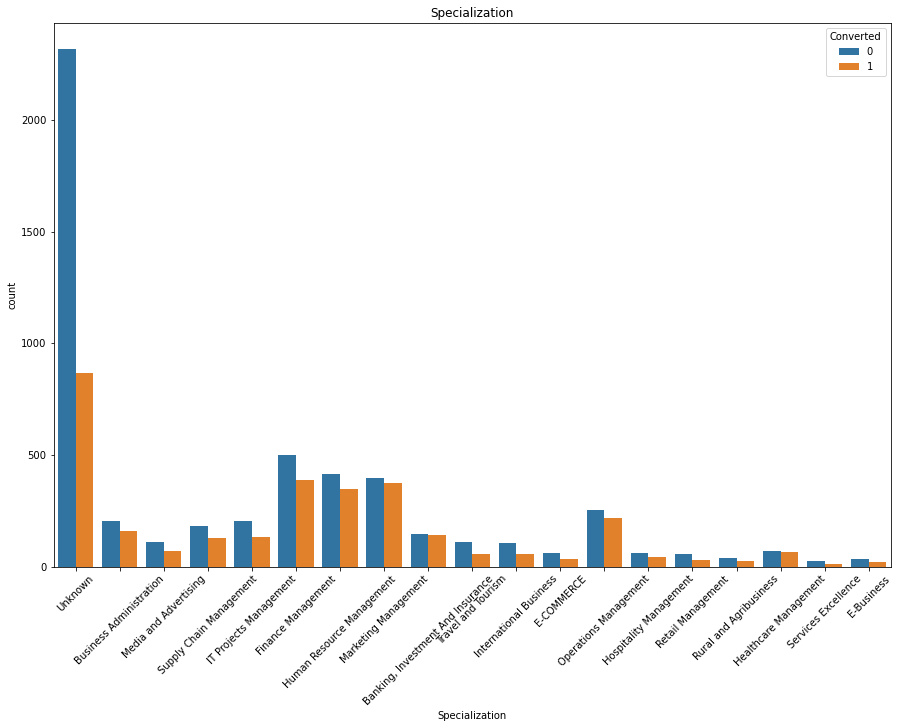

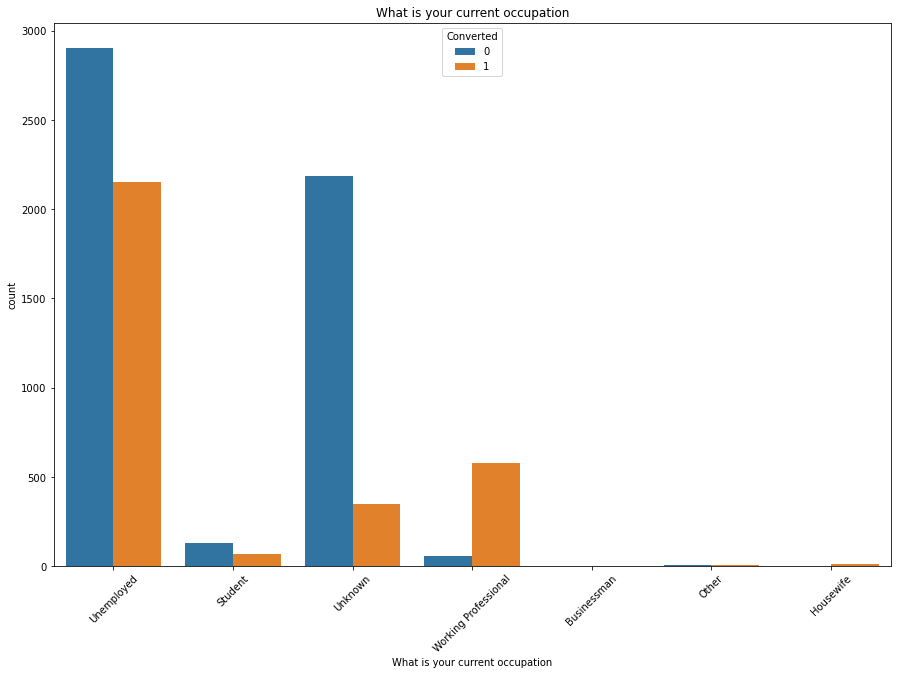

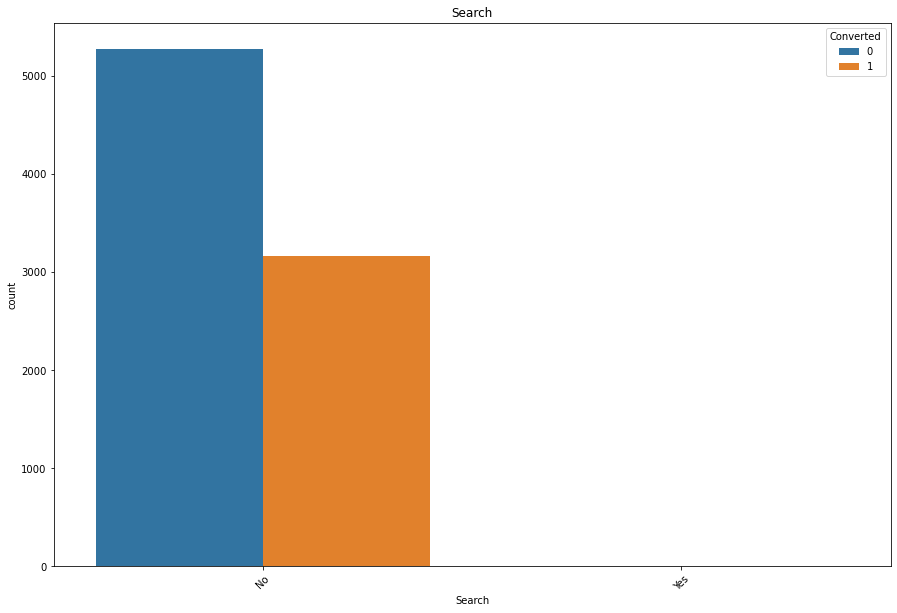

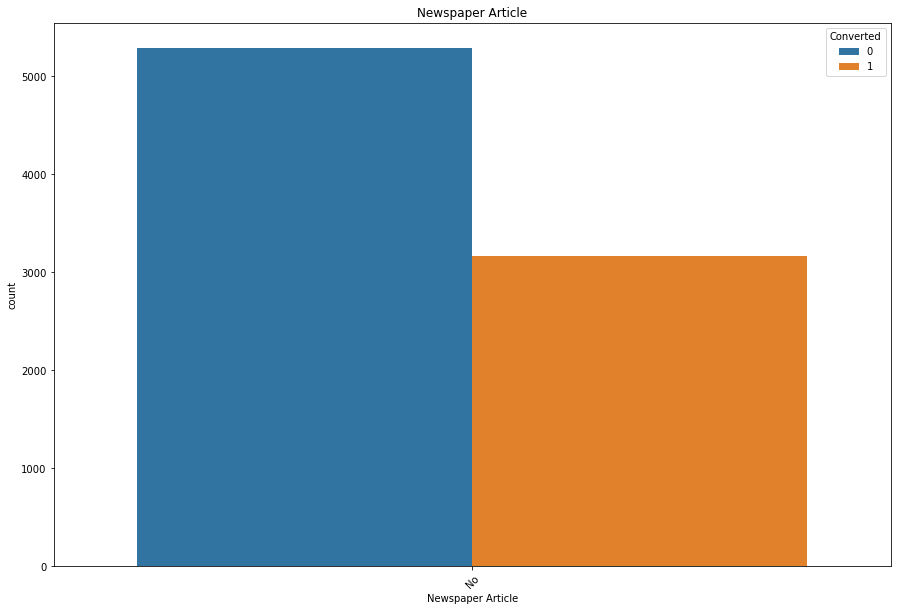

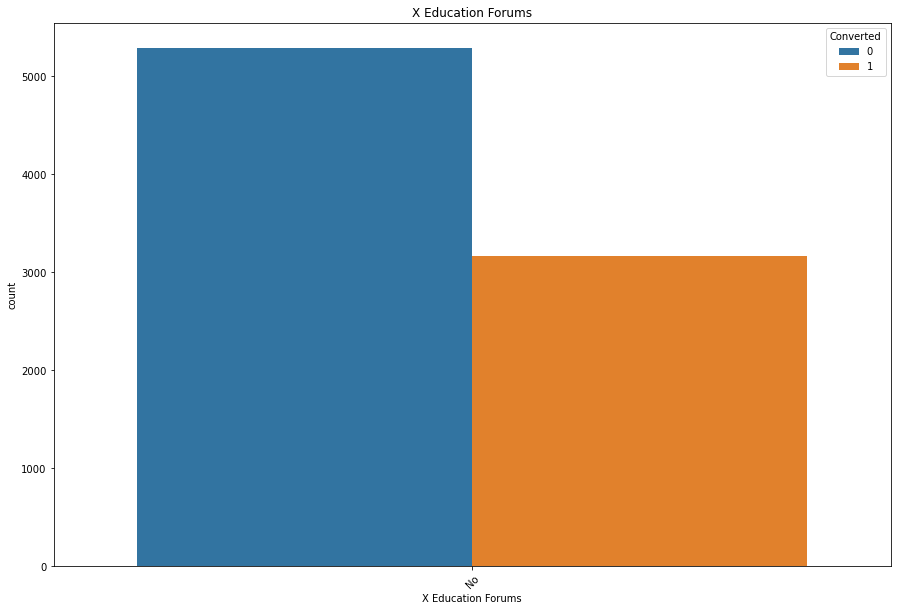

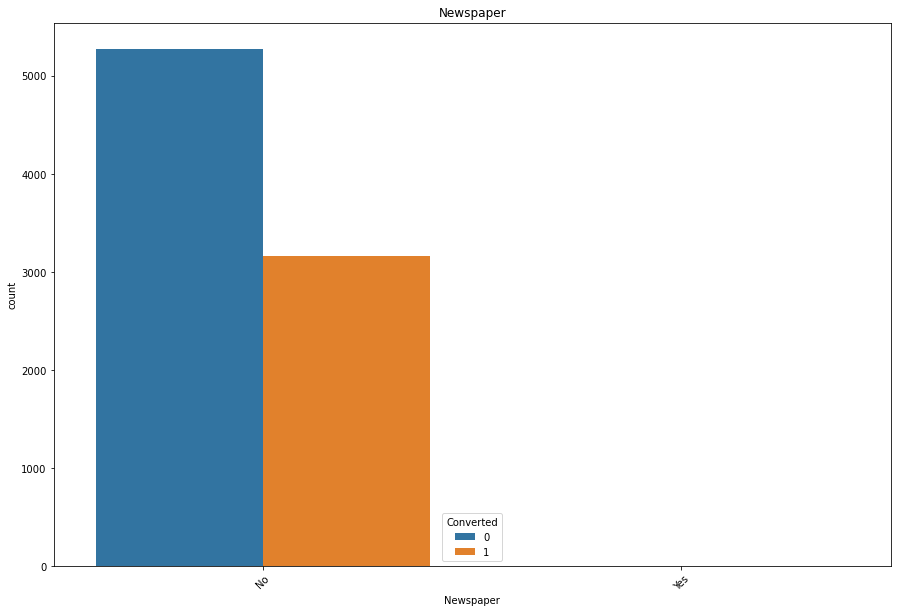

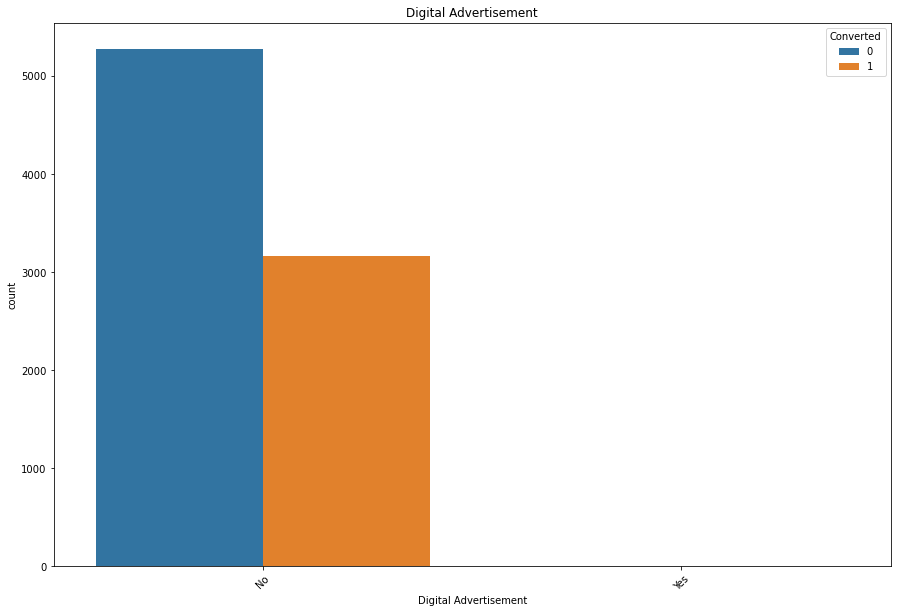

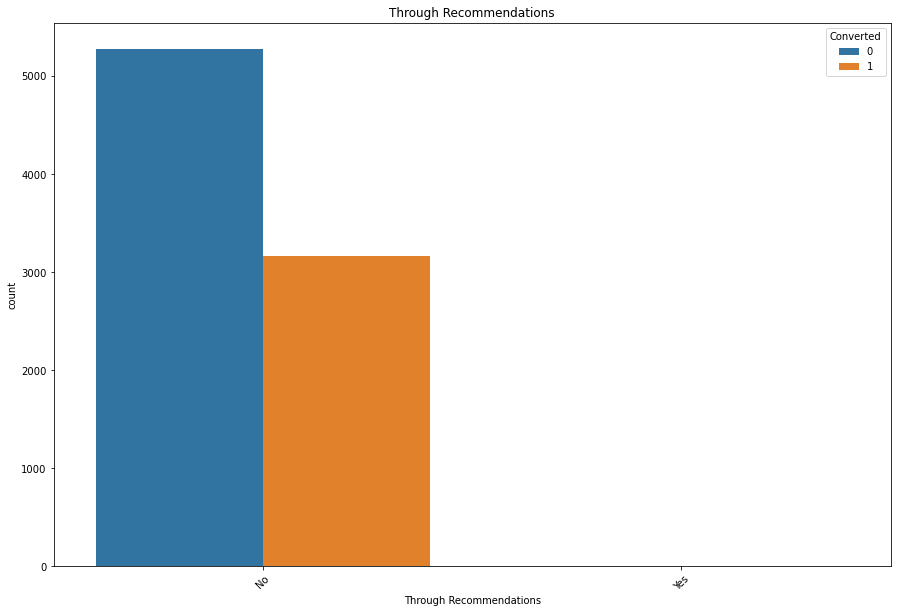

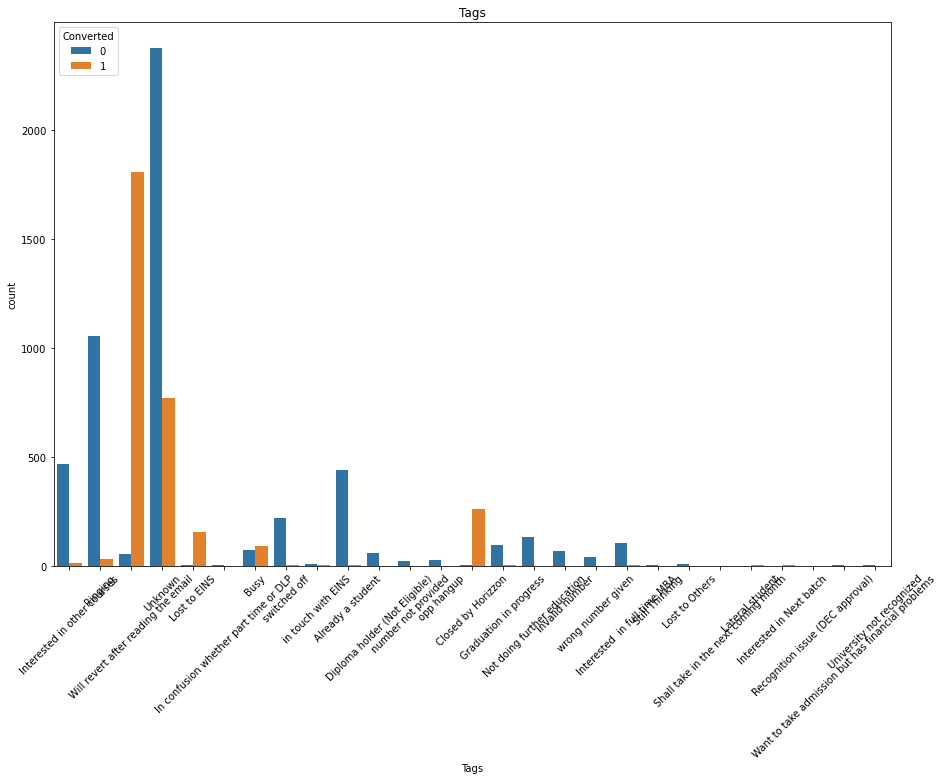

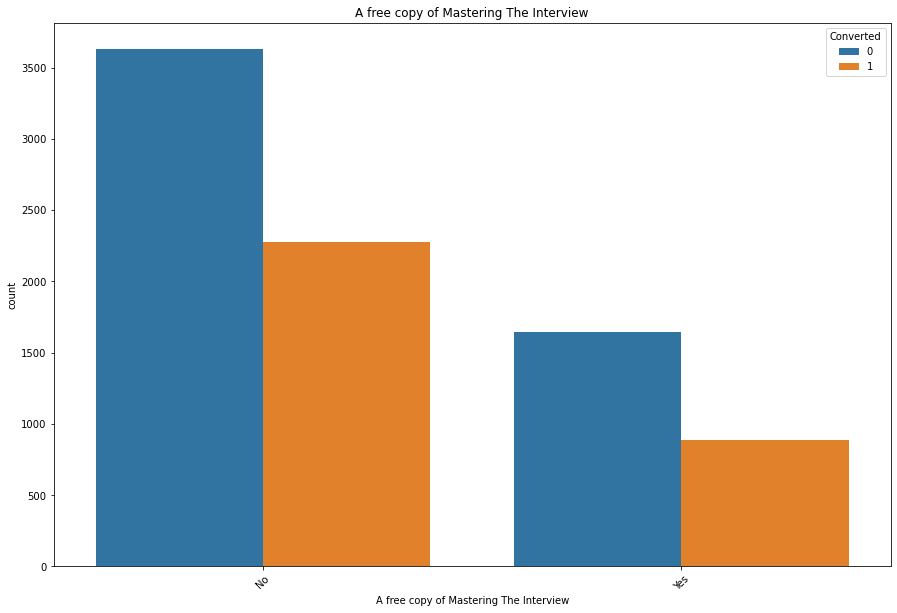

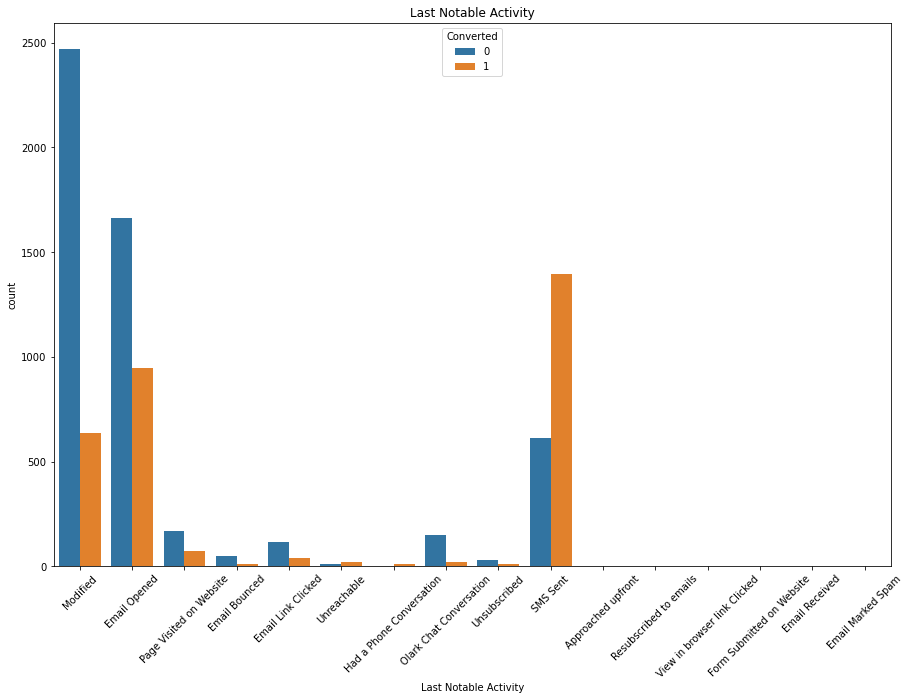

In [57]:
for i in df.select_dtypes(include='O').columns:
    Uni_cat(df,i)

In [58]:
for i in df.select_dtypes(include='O').columns:
    print(i)
    print(df[i].value_counts())
    print('__________________________________________________________________')

Lead Origin
Landing Page Submission    4407
API                        3433
Lead Add Form               576
Lead Import                  29
Name: Lead Origin, dtype: int64
__________________________________________________________________
Lead Source
Google               2709
Direct Traffic       2349
Olark Chat           1742
Organic Search        919
Reference             440
Welingak Website      128
Referral Sites        102
Facebook               30
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
__________________________________________________________________
Do Not Email
No     7795
Yes     650
Name: Do Not Email, dtype: int64
__________________________________

Certain columns have significantly single value, they can be safely dropped, since they will not contribute to predicting conversions

In [59]:
Columns_to_drop=['Do Not Call','Search','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Newspaper','Newspaper Article','Do Not Email']

In [60]:
df=df.drop(Columns_to_drop,axis=1)

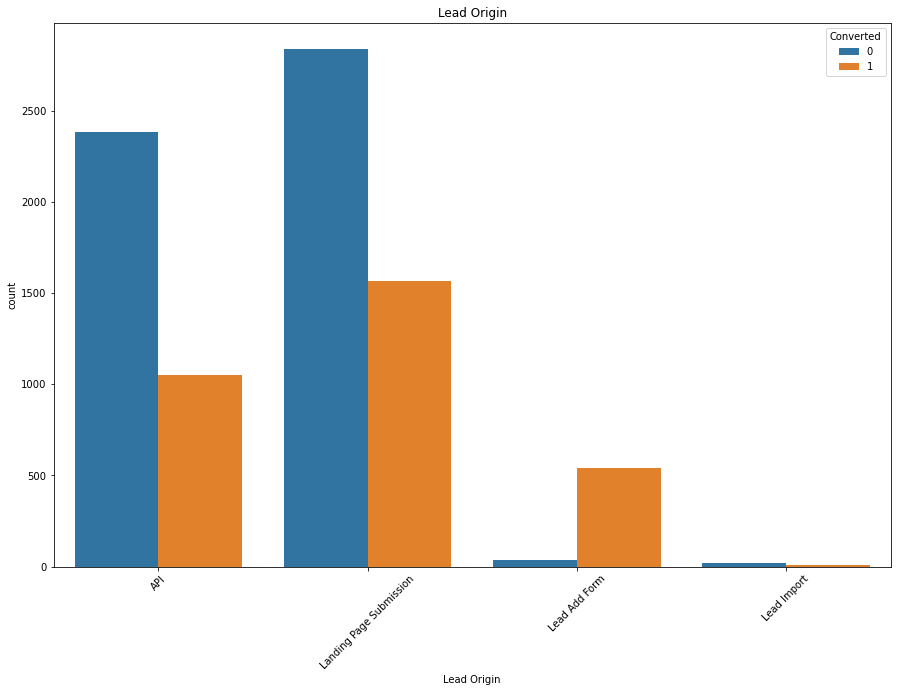

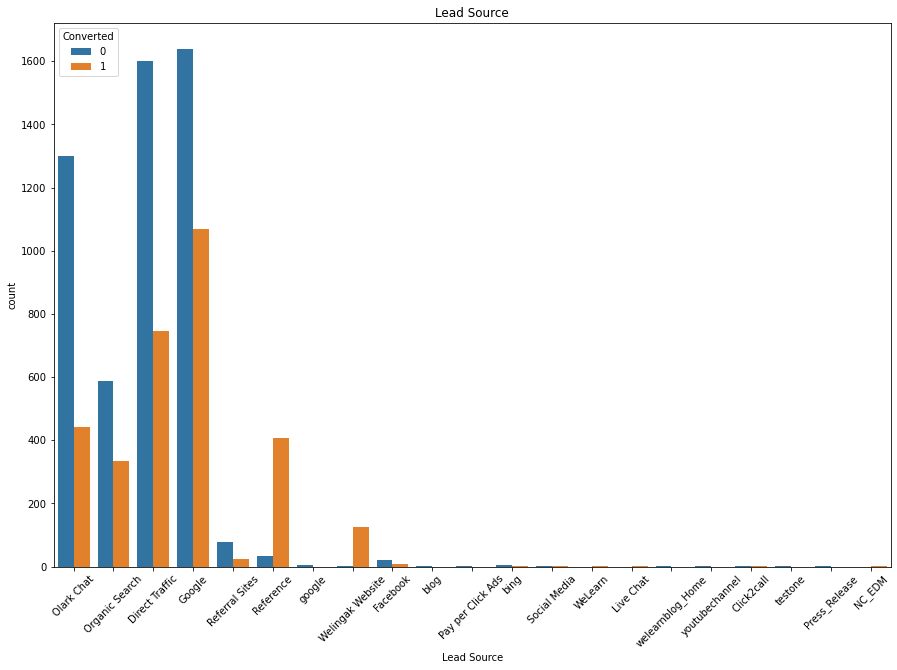

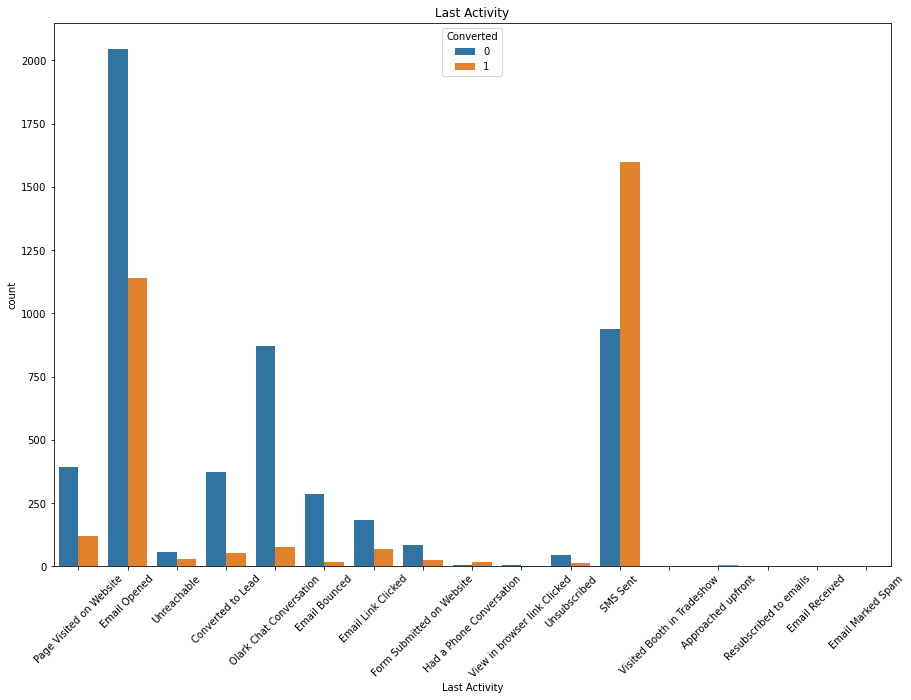

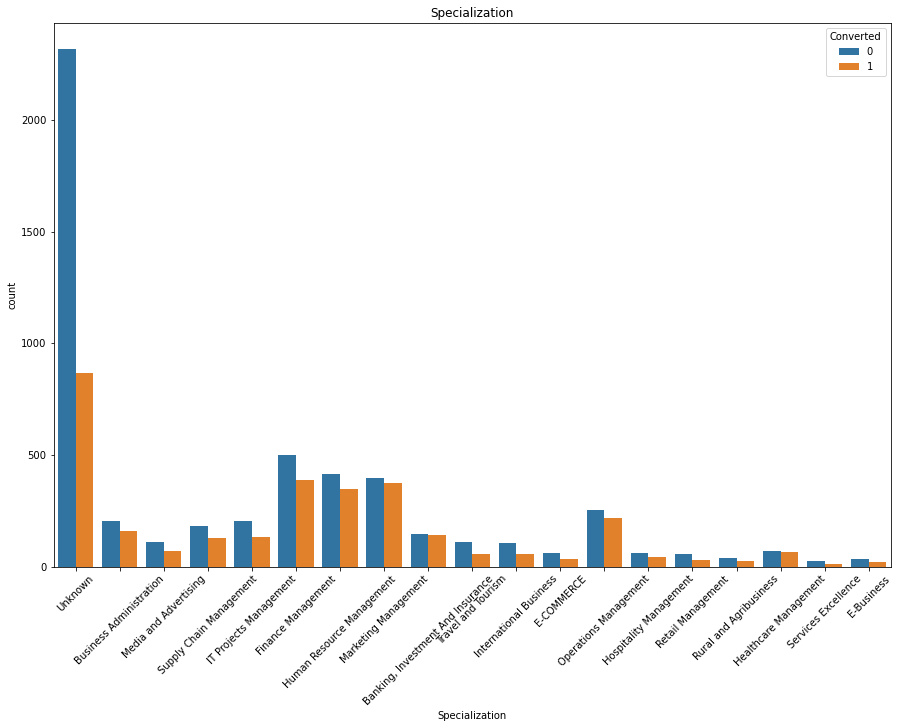

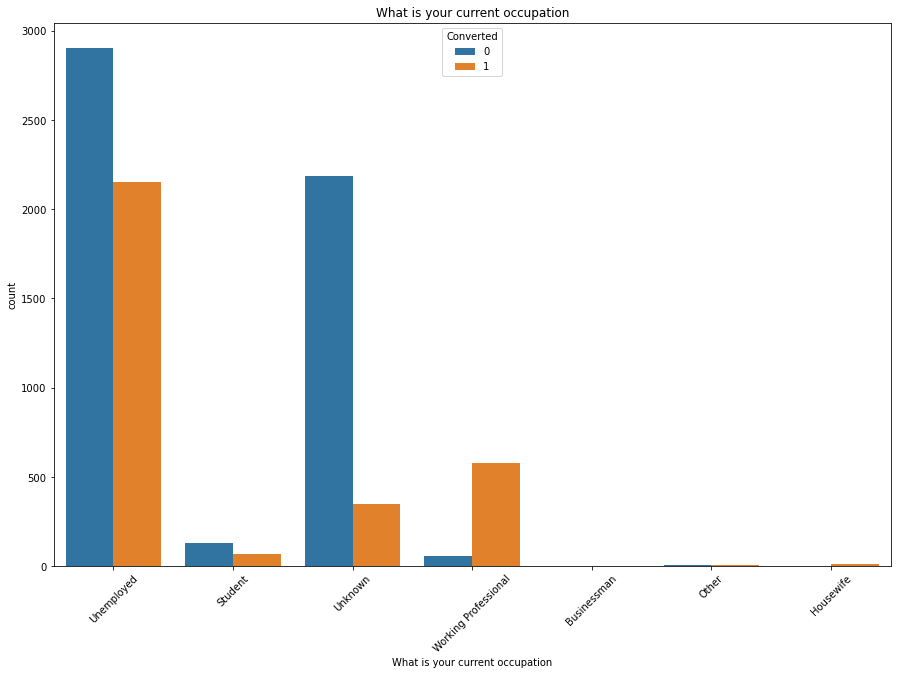

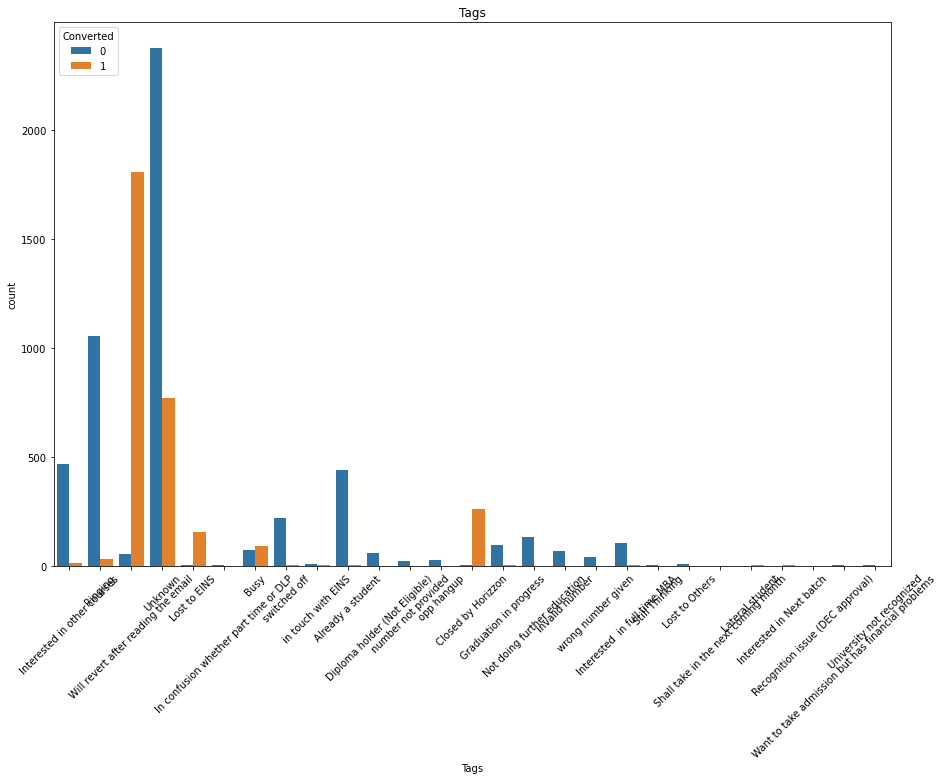

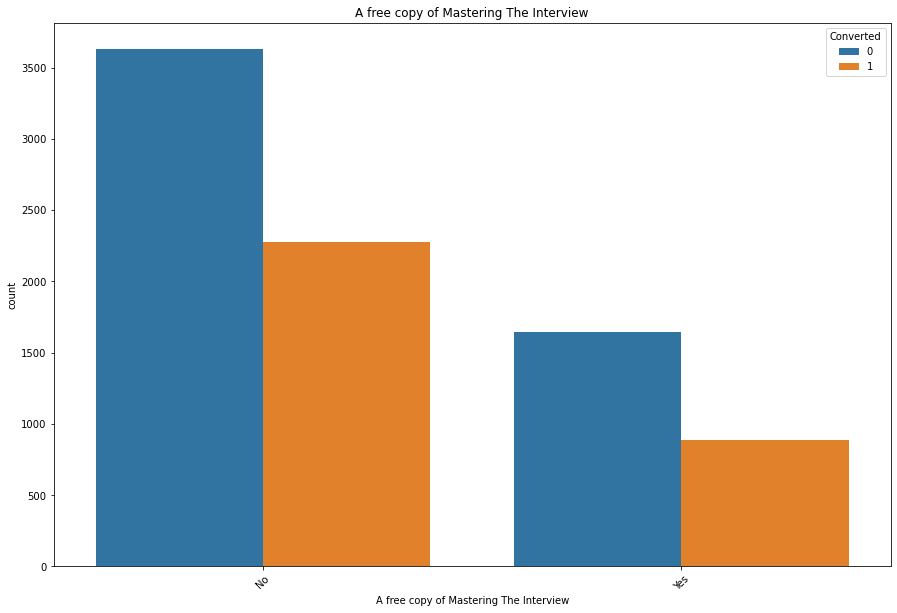

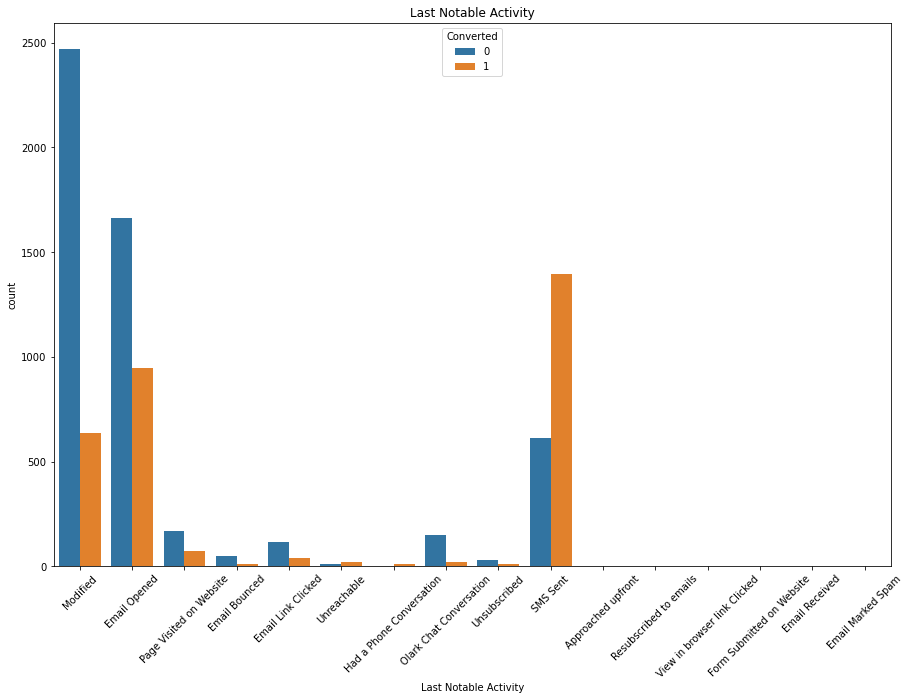

In [61]:
for i in df.select_dtypes(include='O').columns:
    Uni_cat(df,i)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8445 non-null   object 
 1   Lead Source                             8445 non-null   object 
 2   Converted                               8445 non-null   int64  
 3   TotalVisits                             8445 non-null   float64
 4   Total Time Spent on Website             8445 non-null   int64  
 5   Last Activity                           8445 non-null   object 
 6   Specialization                          8445 non-null   object 
 7   What is your current occupation         8445 non-null   object 
 8   Tags                                    8445 non-null   object 
 9   A free copy of Mastering The Interview  8445 non-null   object 
 10  Last Notable Activity                   8445 non-null   obje

In [63]:
for i in df.select_dtypes(include='O').columns:
    print(i)
    print(df[i].value_counts())
    print('________________________________________________')

Lead Origin
Landing Page Submission    4407
API                        3433
Lead Add Form               576
Lead Import                  29
Name: Lead Origin, dtype: int64
________________________________________________
Lead Source
Google               2709
Direct Traffic       2349
Olark Chat           1742
Organic Search        919
Reference             440
Welingak Website      128
Referral Sites        102
Facebook               30
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
________________________________________________
Last Activity
Email Opened                    3184
SMS Sent                        2537
Olark Chat Conversation          944
Page Visited on

 Need to group categories which are having less occurences

In [64]:
def replace_low(df,col,threshold):
    return df[col].replace(df[col].value_counts()[df[col].value_counts()<threshold].index,'Others')

In [65]:
df['Lead Source']=replace_low(df,'Lead Source',400)

In [66]:
df['Lead Source'].value_counts()

Google            2709
Direct Traffic    2349
Olark Chat        1742
Organic Search     919
Reference          440
Others             286
Name: Lead Source, dtype: int64

In [67]:
df['Last Activity']=replace_low(df,'Last Activity',100)

In [68]:
df['Last Activity'].value_counts()

Email Opened                 3184
SMS Sent                     2537
Olark Chat Conversation       944
Page Visited on Website       513
Converted to Lead             425
Email Bounced                 302
Email Link Clicked            254
Others                        176
Form Submitted on Website     110
Name: Last Activity, dtype: int64

In [69]:
df['Last Notable Activity']=replace_low(df,'Last Notable Activity',100)

In [70]:
df['Last Notable Activity'].value_counts()

Modified                   3108
Email Opened               2608
SMS Sent                   2009
Page Visited on Website     238
Olark Chat Conversation     173
Email Link Clicked          160
Others                      149
Name: Last Notable Activity, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8445 non-null   object 
 1   Lead Source                             8445 non-null   object 
 2   Converted                               8445 non-null   int64  
 3   TotalVisits                             8445 non-null   float64
 4   Total Time Spent on Website             8445 non-null   int64  
 5   Last Activity                           8445 non-null   object 
 6   Specialization                          8445 non-null   object 
 7   What is your current occupation         8445 non-null   object 
 8   Tags                                    8445 non-null   object 
 9   A free copy of Mastering The Interview  8445 non-null   object 
 10  Last Notable Activity                   8445 non-null   obje

In [72]:
# Tags are given by the executive who called a lead. It can be dropped to avoid including any preconcieved bias into the model
df.drop('Tags',axis=1,inplace=True)

In [74]:
print('Total available rows after data cleaning are {0}'.format(df.shape[0]))
print('Percentage of data remaining after data cleaning {0}'.format(df.shape[0]/9240*100))
print('{0} percent is a good enough amount of data'.format(df.shape[0]/9240*100))

Total available rows after data cleaning are 8445
Percentage of data remaining after data cleaning 91.3961038961039
91.3961038961039 percent is a good enough amount of data


# Creation of Dummy Variables

Selecting Object variables


In [1371]:
df.select_dtypes(include='O').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1372]:
for i in df.select_dtypes(include='O').columns:
    print(i)
    print(df[i].unique())
    print('________________________________________________')

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
________________________________________________
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Others'
 'Reference']
________________________________________________
Last Activity
['Page Visited on Website' 'Email Opened' 'Others' 'Converted to Lead'
 'Olark Chat Conversation' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Website' 'SMS Sent']
________________________________________________
Specialization
['Unknown' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'Travel and Tourism'
 'International Business' 'E-COMMERCE' 'Operations Management'
 'Hospitality Management' 'Retail Management' 'Rural and Agribusiness'
 'Healthcare Management' 'Services Excellence' 'E-Business']
_________________________________________

In [1373]:
# Creating Dummy variables where there are Unknown values
df_dummies1=pd.get_dummies(df[['What is your current occupation','Specialization']])

In [1374]:
df_dummies1=df_dummies1.drop(['What is your current occupation_Unknown','Specialization_Unknown'],axis=1)

In [1375]:
df_dummies1.head()

,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1376]:
df_dummies2=pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Last Notable Activity','A free copy of Mastering The Interview']])
df_dummies2=df_dummies2.drop(['Lead Source_Others','Last Activity_Others','Last Notable Activity_Others','A free copy of Mastering The Interview_No'],axis=1)
df_dummies2.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,A free copy of Mastering The Interview_Yes
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1377]:
df_final=pd.concat([df_dummies1,df_dummies2],axis=1)

In [1378]:
lead_df=pd.concat([df[['Converted','TotalVisits','Total Time Spent on Website']],df_final],axis=1)

In [1379]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8445 non-null   int64  
 1   TotalVisits                                           8445 non-null   float64
 2   Total Time Spent on Website                           8445 non-null   int64  
 3   What is your current occupation_Businessman           8445 non-null   uint8  
 4   What is your current occupation_Housewife             8445 non-null   uint8  
 5   What is your current occupation_Other                 8445 non-null   uint8  
 6   What is your current occupation_Student               8445 non-null   uint8  
 7   What is your current occupation_Unemployed            8445 non-null   uint8  
 8   What is your current occupation_Working Professional  8445

In [1380]:
### Splitting dataset into Input feature and Target features
X=lead_df.drop(['Converted'],axis=1)
y=lead_df['Converted']

In [1381]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=100)

In [1382]:
### Scaling the values of 'TotalVisists' and 'Total Time Spent on Website'
scaler=MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])
X_train.describe()

,TotalVisits,Total Time Spent on Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,A free copy of Mastering The Interview_Yes
count,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.00000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000,5911.000000
mean,0.273609,0.207436,0.000508,0.001353,0.000846,0.022331,0.596515,0.075960,0.034343,0.043647,0.006090,0.011504,0.10878,0.015903,0.012350,0.089833,0.039756,0.018271,0.092709,0.021485,0.053460,0.010489,0.005752,0.003722,0.034512,0.019286,0.408222,0.519201,0.068686,0.003891,0.276603,0.322957,0.208932,0.105566,0.054475,0.051937,0.034850,0.029944,0.371849,0.013534,0.114871,0.061749,0.299611,0.017933,0.301472,0.378109,0.021655,0.028252,0.235155,0.295551
std,0.233716,0.239652,0.022525,0.036767,0.029074,0.147771,0.490638,0.264957,0.182123,0.204327,0.077809,0.106647,0.31139,0.125109,0.110451,0.285966,0.195403,0.133941,0.290048,0.145008,0.224967,0.101886,0.075630,0.060899,0.182555,0.137540,0.491546,0.499673,0.252940,0.062262,0.447356,0.467646,0.406580,0.307307,0.226971,0.221919,0.183416,0.170448,0.483339,0.115556,0.318893,0.240720,0.458126,0.132718,0.458936,0.484956,0.145565,0.165707,0.424131,0.456328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### Now all the pre-processing of data is done we go for Feature selection (RFE)

## We use RFE and will make automatic selection of 15 features at the Begining.

In [1383]:
logreg=LogisticRegression()

rfe=RFE(logreg, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [1384]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('What is your current occupation_Businessman', False, 27),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 12),
 ('Specialization_Finance Management', False, 9),
 ('Specialization_Healthcare Management', False, 10),
 ('Specialization_Hospitality Management', False, 29),
 ('Specialization_Human Resource Management', False, 17),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_International Business', False, 16),
 ('Specialization_Marketing Management', Fal

In [1385]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1386]:
def model(X_train,cols):
    X_train_sm=sm.add_constant(X_train[cols])
    return sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
  

In [1387]:
def vif(X_train,cols):
    X_train_sm=sm.add_constant(X_train[cols])
    col_vif=X_train_sm.columns
    vif = pd.DataFrame()
    vif['Features'] = X_train_sm[col_vif].columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm[col_vif].values, i) for i in range(X_train_sm[col_vif].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1388]:
lr1=model(X_train,rfe_col)
res=lr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2406.5
Date:                Sun, 16 Jul 2023   Deviance:                       4813.0
Time:                        21:38:22   Pearson chi2:                 5.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4065      0.512     -2.748      0.006      -2.410      -0.403
TotalVisits                                              0.8153      0.211      3.871      0.000       0.402       1.228
Total Time Spent on Website                              4.4564      0.176     25.287      0.000       4.111       4.802
What is your current occupation_Housewife               24.1036   1.48e+04      0.002      0.999   -2.89e+04     2.9e+04
What is your current occupation_Other                    1.4006      0.974      1.437      0.151      -0.509       3.311
What is your current occupation_Student                  1.1050      0.246      4.496      0.000       0.623       1.587
What is your current occupation_Unemployed               1.1770      0.091     12.891      0.000       0.998       1.356
What is your current occupation_Working Professional     3.5179      0.199     17.658      0.000       3.127       3.908
Lead Origin_API                                         -1.0076      0.491     -2.054      0.040      -1.969      -0.046
Lead Origin_Landing Page Submission                     -1.4005      0.488     -2.868      0.004      -2.358      -0.444
Lead Origin_Lead Add Form                                2.7898      0.517      5.400      0.000       1.777       3.802
Lead Source_Olark Chat                                   1.3416      0.143      9.380      0.000       1.061       1.622
Last Activity_Converted to Lead                         -0.9028      0.226     -3.997      0.000      -1.346      -0.460
Last Activity_Email Bounced                             -1.8061      0.327     -5.515      0.000      -2.448      -1.164
Last Activity_Olark Chat Conversation                   -1.3592      0.209     -6.502      0.000      -1.769      -0.949
Last Activity_Page Visited on Website                   -1.0802      0.199     -5.429      0.000      -1.470      -0.690
Last Activity_SMS Sent                                   0.4945      0.146      3.378      0.001       0.208       0.781
Last Notable Activity_Email Link Clicked                -1.2230      0.317     -3.859      0.000      -1.844      -0.602
Last Notable Activity_Email Opened                      -0.7133      0.162     -4.390      0.000      -1.032      -0.395
Last Notable Activity_Modified                          -0.9510      0.126     -7.558      0.000      -1.198      -0.704
Last Notable Activity_Olark Chat Conversation           -1.3044      0.440     -2.966      0.003      -2.166      -0.442
========================================================================================================================
"""

In [1389]:
vif(X_train,rfe_col)

,Features,VIF
0,const,285.26
9,Lead Origin_Landing Page Submission,66.67
8,Lead Origin_API,65.10
10,Lead Origin_Lead Add Form,17.50
18,Last Notable Activity_Email Opened,4.68
16,Last Activity_SMS Sent,3.75
19,Last Notable Activity_Modified,2.98
11,Lead Source_Olark Chat,2.64
14,Last Activity_Olark Chat Conversation,2.23
1,TotalVisits,2.06


In [1390]:
# Dropping What is your current occupation_Housewife due to having high p-value close tp 1
col2=rfe_col.drop('What is your current occupation_Housewife')

In [1391]:
lr2=model(X_train,col2)
res=lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2418.2
Date:                Sun, 16 Jul 2023   Deviance:                       4836.4
Time:                        21:38:34   Pearson chi2:                 5.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3586      0.511     -2.658      0.008      -2.360      -0.357
TotalVisits                                              0.7985      0.210      3.801      0.000       0.387       1.210
Total Time Spent on Website                              4.4550      0.176     25.344      0.000       4.110       4.800
What is your current occupation_Other                    1.3675      0.974      1.404      0.160      -0.542       3.277
What is your current occupation_Student                  1.0681      0.246      4.351      0.000       0.587       1.549
What is your current occupation_Unemployed               1.1409      0.090     12.631      0.000       0.964       1.318
What is your current occupation_Working Professional     3.4791      0.199     17.509      0.000       3.090       3.869
Lead Origin_API                                         -1.0033      0.490     -2.047      0.041      -1.964      -0.043
Lead Origin_Landing Page Submission                     -1.3865      0.488     -2.842      0.004      -2.343      -0.430
Lead Origin_Lead Add Form                                2.8226      0.516      5.465      0.000       1.810       3.835
Lead Source_Olark Chat                                   1.3284      0.143      9.313      0.000       1.049       1.608
Last Activity_Converted to Lead                         -0.9243      0.225     -4.099      0.000      -1.366      -0.482
Last Activity_Email Bounced                             -1.8278      0.327     -5.587      0.000      -2.469      -1.187
Last Activity_Olark Chat Conversation                   -1.3750      0.209     -6.590      0.000      -1.784      -0.966
Last Activity_Page Visited on Website                   -1.1011      0.199     -5.545      0.000      -1.490      -0.712
Last Activity_SMS Sent                                   0.4719      0.146      3.235      0.001       0.186       0.758
Last Notable Activity_Email Link Clicked                -1.2113      0.313     -3.869      0.000      -1.825      -0.598
Last Notable Activity_Email Opened                      -0.7240      0.162     -4.470      0.000      -1.041      -0.407
Last Notable Activity_Modified                          -0.9526      0.126     -7.584      0.000      -1.199      -0.706
Last Notable Activity_Olark Chat Conversation           -1.3072      0.439     -2.975      0.003      -2.169      -0.446
========================================================================================================================
"""

In [1392]:
vif(X_train,col2)

,Features,VIF
0,const,285.22
8,Lead Origin_Landing Page Submission,66.67
7,Lead Origin_API,65.10
9,Lead Origin_Lead Add Form,17.50
17,Last Notable Activity_Email Opened,4.67
15,Last Activity_SMS Sent,3.75
18,Last Notable Activity_Modified,2.98
10,Lead Source_Olark Chat,2.64
13,Last Activity_Olark Chat Conversation,2.23
1,TotalVisits,2.06


In [1393]:
# drop What is your current occupation_Other due to High p-value
col3=col2.drop('What is your current occupation_Other')

In [1394]:
lr3=model(X_train,col3)
res=lr3.fit()
print(res.summary())
vif(X_train,col3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2419.2
Date:                Sun, 16 Jul 2023   Deviance:                       4838.4
Time:                        21:38:59   Pearson chi2:                 5.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,const,285.22
7,Lead Origin_Landing Page Submission,66.67
6,Lead Origin_API,65.10
8,Lead Origin_Lead Add Form,17.50
16,Last Notable Activity_Email Opened,4.67
14,Last Activity_SMS Sent,3.75
17,Last Notable Activity_Modified,2.98
9,Lead Source_Olark Chat,2.64
12,Last Activity_Olark Chat Conversation,2.23
1,TotalVisits,2.06


In [1395]:
# Drop 'Lead Origin API' due to VIF value being more than 5 and also it is lesser in number combared to Lead Origin_Landing Page Submission
col4=col3.drop('Lead Origin_API')

In [1396]:
lr4=model(X_train,col4)
res=lr4.fit()
print(res.summary())
vif(X_train,col4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2421.0
Date:                Sun, 16 Jul 2023   Deviance:                       4842.1
Time:                        21:40:58   Pearson chi2:                 5.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,const,32.76
15,Last Notable Activity_Email Opened,4.67
13,Last Activity_SMS Sent,3.75
16,Last Notable Activity_Modified,2.98
8,Lead Source_Olark Chat,2.58
11,Last Activity_Olark Chat Conversation,2.22
1,TotalVisits,2.03
6,Lead Origin_Landing Page Submission,1.78
7,Lead Origin_Lead Add Form,1.69
12,Last Activity_Page Visited on Website,1.56


### lm4 appears to be a stable model because both p-value and vif are within required limits

### Applying the lm4 model to test set

In [1397]:
X_train_sm=sm.add_constant(X_train[col4])

In [1398]:
y_train_pred=res.predict(X_train_sm)

In [1399]:
y_train_pred

5279    0.006965
3099    0.156176
91      0.892292
1577    0.868034
487     0.068134
758     0.264955
7260    0.164205
7538    0.597805
2404    0.109671
8190    0.955657
6458    0.910461
442     0.144983
8418    0.860965
8550    0.097385
5829    0.117905
8221    0.148244
4057    0.839070
5258    0.831858
1917    0.351693
7674    0.985552
2004    0.324071
5172    0.147853
5457    0.148244
6139    0.036451
7532    0.256609
349     0.097385
1454    0.824282
6429    0.552428
897     0.082552
3937    0.953679
1793    0.115713
910     0.045094
4045    0.492903
6648    0.178244
730     0.140747
8070    0.995546
5266    0.857379
5999    0.437510
5765    0.059835
4928    0.363161
3983    0.977818
5886    0.005924
6721    0.096435
1486    0.114469
3728    0.012334
1295    0.134214
2655    0.995546
2653    0.985552
3914    0.810032
5770    0.097385
6205    0.058135
6624    0.775651
1189    0.685939
783     0.041880
9177    0.087162
4944    0.797523
1408    0.985299
7033    0.955657
384     0.2053

In [1400]:
y_train_pred=y_train_pred.values.reshape(-1)

In [1401]:
y_train_pred[:10]

array([0.00696537, 0.15617588, 0.89229211, 0.86803359, 0.06813411,
       0.26495516, 0.16420547, 0.59780503, 0.10967093, 0.95565738])

In [1402]:
# As we are working with logistic regression model, for evaluation of model we have to create confusion matrix
# For this we need actual convrted and predicted converted. y_train contains actual converted values whereas the y_train_pred 
# contains probability predicted by our model, which is to be converted to binary values 0(not_converted) and 1(converted).
y_train_pred_final=pd.DataFrame({'Actual_Converted':y_train.values,'Probability_Converted':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Actual_Converted,Probability_Converted,Prospect ID
0,0,0.006965,5279
1,0,0.156176,3099
2,1,0.892292,91
3,1,0.868034,1577
4,0,0.068134,487


In [1403]:
# Initially taking 0.5 as threshold probability for deciding convertions
# Probability to be converted is predicted above now we convert all probablity values >= 0.5(50%) to 1 and < 0.5 to 0.
y_train_pred_final['Predicted']=y_train_pred_final['Probability_Converted'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual_Converted,Probability_Converted,Prospect ID,Predicted
0,0,0.006965,5279,0
1,0,0.156176,3099,0
2,1,0.892292,91,1
3,1,0.868034,1577,1
4,0,0.068134,487,0


#### CREATING CONFUSION MATRIX FROM ABOVE VALUES of y_train_pred_final

In [1404]:
conf_mat=metrics.confusion_matrix(y_train_pred_final['Actual_Converted'], y_train_pred_final['Predicted'])
conf_mat

array([[3289,  405],
       [ 688, 1529]], dtype=int64)

In [1405]:
# Now we calculate TP, TN, FP, FN
TP=conf_mat[1,1]
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

In [1406]:
print("*** Accuracy ***")
accuracy=metrics.accuracy_score(y_train_pred_final.Actual_Converted,y_train_pred_final.Predicted)
print('By accuracy_score:',round(accuracy,2)) # Calculated automatically with inbuilt function accuracy_score
print('By Manual Calculation:',round((TP+TN)/(TP+TN+FP+FN),2))

*** Accuracy ***
By accuracy_score: 0.82
By Manual Calculation: 0.82


In [1407]:
# TPR or Sensitivity = TP/TP+FN
sensitivity=round(TP/float(TP+FN),2)
print("Sensitivity: ",sensitivity)
# TNR or Specificity = TN/TN+FP
specificity=round(TN/float(TN+FP),2)
print("Specificity: ",specificity)
# FPR = FP/FP+TN
FPR=round(FP/float(FP+TN),2)
print("False Positive Rate: ", FPR) # 1-Specificity
# FNR = FN/FN+TP
FNR=round(FN/float(FN+TP),2)
print("False Negative Rate: ", FNR)

Sensitivity:  0.69
Specificity:  0.89
False Positive Rate:  0.11
False Negative Rate:  0.31


### From above we observe that specificity is good almost 89% but sensitivity is poor comparatively upto 70%.

In [1408]:
### ROC Receiver's Opwerating Characteristics Curve
def DrawROCCurve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs)
    plt.figure(figsize=(8, 8))
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, label='(Area under curve= %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
  
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, threshold=metrics.roc_curve(y_train_pred_final.Actual_Converted,y_train_pred_final.Probability_Converted, drop_intermediate=False)

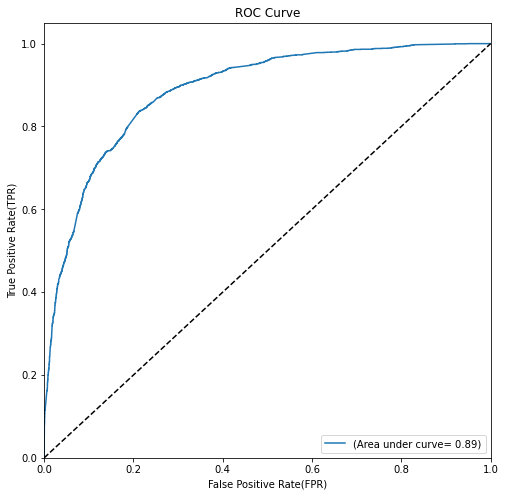

In [1409]:
DrawROCCurve(y_train_pred_final.Actual_Converted,y_train_pred_final.Probability_Converted)

### Above ROC under curve area is almost 89% which means our model is good. 


In [1410]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Probability_Converted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Converted,Probability_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006965,5279,0,1,0,0,0,0,0,0,0,0,0
1,0,0.156176,3099,0,1,1,0,0,0,0,0,0,0,0
2,1,0.892292,91,1,1,1,1,1,1,1,1,1,1,0
3,1,0.868034,1577,1,1,1,1,1,1,1,1,1,1,0
4,0,0.068134,487,0,1,0,0,0,0,0,0,0,0,0


In [1411]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.630689  0.972936  0.425284
0.2   0.2  0.753849  0.911141  0.659448
0.3   0.3  0.792590  0.868742  0.746887
0.4   0.4  0.808323  0.759134  0.837845
0.5   0.5  0.815091  0.689671  0.890363
0.6   0.6  0.804602  0.617050  0.917163
0.7   0.7  0.782440  0.507442  0.947482
0.8   0.8  0.763323  0.419035  0.969951
0.9   0.9  0.705803  0.235453  0.988089


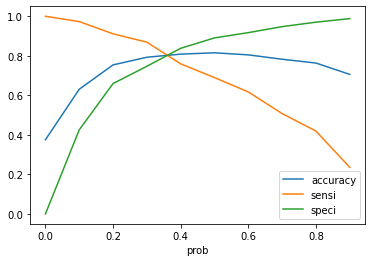

In [1412]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# We will look at Precision & Recall View
It is because we want to maximise True Positives more while avoiding False Positives to avoid wasting efforts on leads which may not convert
- So our aim will be to maximise Precision

In [1413]:
# Precision and Recall calculation
precision=round(TP/float(TP+FP),2)
print('Precision:',precision)
recall=round(TP/float(TP+FN),2)
print('Recall:',recall)

Precision: 0.79
Recall: 0.69


In [1414]:
precision_recall_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Probability_Converted)

(array([0.38745194, 0.38836313, 0.3884312 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99548940e-01, 9.99548940e-01, ...,
        9.02119982e-04, 4.51059991e-04, 0.00000000e+00]),
 array([0.02169078, 0.02175555, 0.02187084, ..., 0.99761677, 0.99782792,
        0.9983361 ]))

In [1415]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Probability_Converted)


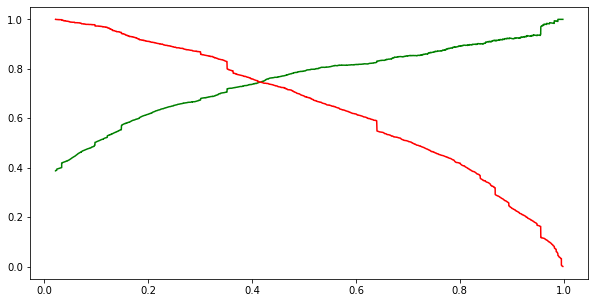

In [1416]:
plt.figure(figsize=[10,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### From above graph it appears 0.42 is optimum threshold for optimizing Precision and Recall

In [1417]:
y_train_pred_final['Predicted_final']=y_train_pred_final.Probability_Converted.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Actual_Converted,Probability_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,0,0.006965,5279,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.156176,3099,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.892292,91,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.868034,1577,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.068134,487,0,1,0,0,0,0,0,0,0,0,0,0


In [1418]:
conf_mat=metrics.confusion_matrix(y_train_pred_final['Actual_Converted'], y_train_pred_final['Predicted_final'])
conf_mat

array([[3143,  551],
       [ 567, 1650]], dtype=int64)

In [1419]:
# Now we calculate TP, TN, FP, FN
TP=conf_mat[1,1]
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

In [1420]:
print("*** Accuracy ***")
accuracy=metrics.accuracy_score(y_train_pred_final.Actual_Converted,y_train_pred_final.Predicted)
print('By accuracy_score:',round(accuracy,2)) # Calculated automatically with inbuilt function accuracy_score
print('By Manual Calculation:',round((TP+TN)/(TP+TN+FP+FN),2))

*** Accuracy ***
By accuracy_score: 0.82
By Manual Calculation: 0.81


In [1421]:
# TPR or Sensitivity = TP/TP+FN
sensitivity=round(TP/float(TP+FN),2)
print("Sensitivity: ",sensitivity)
# TNR or Specificity = TN/TN+FP
specificity=round(TN/float(TN+FP),2)
print("Specificity: ",specificity)
# FPR = FP/FP+TN
FPR=round(FP/float(FP+TN),2)
print("False Positive Rate: ", FPR) # 1-Specificity
# FNR = FN/FN+TP
FNR=round(FN/float(FN+TP),2)
print("False Negative Rate: ", FNR)

Sensitivity:  0.74
Specificity:  0.85
False Positive Rate:  0.15
False Negative Rate:  0.26


In [1422]:
# Precision and Recall calculation
precision=round(TP/float(TP+FP),2)
print('Precision:',precision)
recall=round(TP/float(TP+FN),2)
print('Recall:',recall)

Precision: 0.75
Recall: 0.74


## However The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
### This is equivalent to Precision i.e the percentage of actual conversions out of all predicted conversions. In the Precsion vs Recall graph Precision is 0.8 at approxiimately threshold of 0.52

In [1423]:
y_train_pred_final['Predicted_final']=y_train_pred_final.Probability_Converted.map(lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

,Actual_Converted,Probability_Converted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,0,0.006965,5279,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.156176,3099,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.892292,91,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.868034,1577,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.068134,487,0,1,0,0,0,0,0,0,0,0,0,0


In [1424]:
conf_mat=metrics.confusion_matrix(y_train_pred_final['Actual_Converted'], y_train_pred_final['Predicted_final'])
conf_mat

array([[3317,  377],
       [ 729, 1488]], dtype=int64)

In [1425]:
# Now we calculate TP, TN, FP, FN
TP=conf_mat[1,1]
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

In [1426]:
print("*** Accuracy ***")
accuracy=metrics.accuracy_score(y_train_pred_final.Actual_Converted,y_train_pred_final.Predicted)
print('By accuracy_score:',round(accuracy,2)) # Calculated automatically with inbuilt function accuracy_score
print('By Manual Calculation:',round((TP+TN)/(TP+TN+FP+FN),2))

*** Accuracy ***
By accuracy_score: 0.82
By Manual Calculation: 0.81


In [1427]:
# TPR or Sensitivity = TP/TP+FN
sensitivity=round(TP/float(TP+FN),2)
print("Sensitivity: ",sensitivity)
# TNR or Specificity = TN/TN+FP
specificity=round(TN/float(TN+FP),2)
print("Specificity: ",specificity)
# FPR = FP/FP+TN
FPR=round(FP/float(FP+TN),2)
print("False Positive Rate: ", FPR) # 1-Specificity
# FNR = FN/FN+TP
FNR=round(FN/float(FN+TP),2)
print("False Negative Rate: ", FNR)

Sensitivity:  0.67
Specificity:  0.9
False Positive Rate:  0.1
False Negative Rate:  0.33


In [1428]:
# Precision and Recall calculation
precision=round(TP/float(TP+FP),2)
print('Precision:',precision)
recall=round(TP/float(TP+FN),2)
print('Recall:',recall)

Precision: 0.8
Recall: 0.67


### We built the model and successfully applied on training dataset, now we will apply on testing data.

In [1429]:
### Scaling the values of 'TotalVisists' and 'Total Time Spent on Website' and 'Page Views Per Visit' In X_test

X_test[['TotalVisits','Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])
X_test.describe()

,TotalVisits,Total Time Spent on Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,A free copy of Mastering The Interview_Yes
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.279637,0.209238,0.000789,0.000395,0.002762,0.025651,0.603788,0.071429,0.033938,0.041436,0.005919,0.011444,0.097474,0.015391,0.011050,0.091160,0.040253,0.021310,0.086819,0.020521,0.061168,0.009471,0.010260,0.005130,0.041831,0.020126,0.402526,0.528019,0.067088,0.002368,0.281768,0.315706,0.200079,0.116417,0.046567,0.046567,0.037885,0.030387,0.389108,0.011839,0.104578,0.058406,0.302289,0.021310,0.325967,0.344515,0.017758,0.028019,0.244278,0.310971
std,0.231432,0.242292,0.028088,0.019865,0.052497,0.158123,0.489206,0.257590,0.181106,0.199337,0.076725,0.106385,0.296661,0.123125,0.104556,0.287894,0.196590,0.144445,0.281626,0.141802,0.239686,0.096877,0.100793,0.071456,0.200243,0.140460,0.490504,0.499313,0.250223,0.048612,0.449950,0.464888,0.400138,0.320787,0.210750,0.210750,0.190955,0.171683,0.487644,0.108182,0.306069,0.234555,0.459340,0.144445,0.468827,0.475304,0.132098,0.165059,0.429743,0.462982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.002219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [1430]:
X_test_sm=sm.add_constant(X_test[col4])

In [1431]:
y_test_pred=res.predict(X_test_sm)

In [1432]:
y_test_pred.values.reshape(-1)

array([0.84907638, 0.52805958, 0.64568272, ..., 0.36970273, 0.55113788,
       0.15776151])

In [1433]:
y_test

1926    1
5654    0
1209    0
5234    0
8497    0
1918    0
7405    0
6561    0
5492    1
7851    1
2472    1
1651    1
99      1
655     0
1628    1
5882    1
4516    0
6738    0
357     0
5065    0
6474    0
9026    0
4155    1
425     0
1374    1
3837    1
483     0
4487    1
367     0
198     0
1163    0
8971    1
772     0
3037    0
5822    1
8943    1
4277    0
6905    0
7692    1
1976    0
4505    1
5962    1
5759    0
9197    1
3154    0
2662    1
458     0
7707    1
732     0
6195    0
3267    1
1808    0
6073    0
7028    0
2334    1
4684    0
1702    0
7079    0
1557    1
4937    0
5561    1
8288    0
8590    0
3541    0
4639    0
3672    0
1731    1
2060    1
5222    0
5600    0
2832    0
3848    0
5083    0
3472    0
4246    0
3943    0
3841    1
8367    0
6831    0
5718    0
9217    0
252     0
1607    0
8625    1
7426    0
8679    0
7087    0
6412    1
1850    0
2545    0
4615    0
7334    1
4088    1
2946    1
3452    1
759     0
8452    1
6830    0
7452    1
1397    1


In [1434]:
y_test_df=y_test.reset_index()

In [1435]:
y_test_df.head()

,index,Converted
0,1926,1
1,5654,0
2,1209,0
3,5234,0
4,8497,0


In [1436]:
y_test_df['Convert_Prob']=y_test_pred.values.reshape(-1)

In [1437]:
y_test_df.head()

,index,Converted,Convert_Prob
0,1926,1,0.849076
1,5654,0,0.528060
2,1209,0,0.645683
3,5234,0,0.211528
4,8497,0,0.114886


In [1438]:
y_test_df['Predicted']=y_test_df.Convert_Prob.map(lambda x: 1 if x>0.52 else 0)

In [1439]:
y_test_df['Lead Score']=y_test_pred.values.reshape(-1)*100

In [1440]:
y_test_df.head()

,index,Converted,Convert_Prob,Predicted,Lead Score
0,1926,1,0.849076,1,84.907638
1,5654,0,0.528060,1,52.805958
2,1209,0,0.645683,1,64.568272
3,5234,0,0.211528,0,21.152817
4,8497,0,0.114886,0,11.488554


In [1441]:
cm_test=metrics.confusion_matrix(y_test_df.Converted,y_test_df.Predicted)

In [1442]:
cm_test

array([[1429,  157],
       [ 284,  664]], dtype=int64)

In [1443]:
TP = cm_test[1,1] # true positive 
TN = cm_test[0,0] # true negatives
FP = cm_test[0,1] # false positives
FN = cm_test[1,0] # false negatives

In [1444]:
print("*** Accuracy ***")
test_accuracy=metrics.accuracy_score(y_test_df.Converted,y_test_df.Predicted)
print('Test accuracy_score:',round(accuracy,2)) # Calculated automatically with inbuilt function accuracy_score
print('test accuracy Manual Calculation:',round((TP+TN)/(TP+TN+FP+FN),2))

*** Accuracy ***
Test accuracy_score: 0.82
test accuracy Manual Calculation: 0.83


In [1445]:
# TPR or Sensitivity = TP/TP+FN
test_sensitivity=round(TP/float(TP+FN),2)
print("Test Sensitivity: ",sensitivity)
# TNR or Specificity = TN/TN+FP
test_specificity=round(TN/float(TN+FP),2)
print("Test Specificity: ",specificity)
# FPR = FP/FP+TN
test_FPR=round(FP/float(FP+TN),2)
print("Test False Positive Rate: ", FPR) # 1-Specificity
# FNR = FN/FN+TP
test_FNR=round(FN/float(FN+TP),2)
print("Test False Negative Rate: ", FNR)

Test Sensitivity:  0.67
Test Specificity:  0.9
Test False Positive Rate:  0.1
Test False Negative Rate:  0.33


In [1446]:
# Precision and Recall calculation
test_precision=round(TP/float(TP+FP),2)
print('Test Precision:',precision)
test_recall=round(TP/float(TP+FN),2)
print('Test Recall:',recall)

Test Precision: 0.8
Test Recall: 0.67


In [1447]:
### EVALUATION OF MODEL CREATED ON THE BASIS OF TRAIN TEST SPLIT
print(' '*22,'Train','<-->','Test')
print('ACCURACY:',' '*(22-len('ACCURACY:')),round(accuracy,2),'<-->', round(test_accuracy,2)) 
print("Sensitivity: ",' '*(22-len('Sensitivity: ')),round(sensitivity,2),'<-->',round(test_sensitivity,2))
print("Specificity: ",' '*(22-len('Specificity: ')),round(specificity,2),'<-->',round(test_specificity,2))
print("False Positive Rate: ",' '*(22-len('False Positive Rate: ')), round(FPR,2),'<-->', round(test_FPR,2))
print("False Negative Rate: ",' '*(22-len('False Negative Rate: ')), round(FNR,2),'<-->', round(test_FNR,2))
print("Precision: ",' '*(22-len('Precision: ')), round(precision,2),'<-->', round(test_precision,2))
print("Recall: ",' '*(22-len('Recall: ')), round(recall,2),'<-->', round(test_recall,2))

                       Train <--> Test
ACCURACY:               0.82 <--> 0.83
Sensitivity:            0.67 <--> 0.7
Specificity:            0.9 <--> 0.9
False Positive Rate:    0.1 <--> 0.1
False Negative Rate:    0.33 <--> 0.3
Precision:              0.8 <--> 0.81
Recall:                 0.67 <--> 0.7


# The Evaluation Metrics of both train and test sets are almost equal, So the model is an acceptable model
### All leads having Lead Score more than 52 can be persued more for achieving a conversion rate of 80% as Targeted by CEO

In [1448]:
### Important features to be focused
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.433996
Lead Origin_Lead Add Form                               3.775275
What is your current occupation_Working Professional    3.475815
Lead Source_Olark Chat                                  1.279984
What is your current occupation_Unemployed              1.136832
What is your current occupation_Student                 1.060373
TotalVisits                                             0.744978
Last Activity_SMS Sent                                  0.484063
Lead Origin_Landing Page Submission                    -0.403656
Last Notable Activity_Email Opened                     -0.702707
Last Notable Activity_Modified                         -0.935065
Last Activity_Converted to Lead                        -0.942365
Last Activity_Page Visited on Website                  -1.077878
Last Notable Activity_Email Link Clicked               -1.195694
Last Notable Activity_Olark Chat Conversation          -1.280202
Last Activity_Olark Chat 